In [1]:
import numpy as np
import pandas as pd
from datetime import date
from funciones import datos, analisis, modelado

### **Datos con calificacion hecha por Ysamar de forma manual**

In [2]:
base1 = pd.read_csv(r'C:\Users\User\Documents\Backup\Proyectos\Aumento_Cupo\DB\Base_Aumentos1.csv', sep=';', decimal=',', encoding='latin-1')
base2 = pd.read_csv(r'C:\Users\User\Documents\Backup\Proyectos\Aumento_Cupo\DB\Base_Aumentos2.csv', sep=';', decimal=',', encoding='latin-1')

In [3]:
base2.head()

Fecha      Cedula  Cupo_Solicitado   Ingreso  Prom_Dias_al_pago_u12m  \
0  2021-08    80064132           500000  35892855                    -2.0   
1  2021-05  1045667594           400000  22861058                   136.0   
2  2021-04    77090422           500000  20292227                    -4.0   
3  2021-08  1034318585           700000  18756420                     1.0   
4  2021-10  1034318585           750000  18756420                    -2.0   

   Prom_Dias_al_pago_ultim_cred  Num_Cred_sin_nov  Num_Cred_con_nov    Fuente  \
0                          -4.0              11.0              14.0  MAREIGUA   
1                           2.0               6.0              10.0  MAREIGUA   
2                          -4.0               2.0               2.0  MAREIGUA   
3                           1.0               1.0               1.0  MAREIGUA   
4                          -4.0               4.0               4.0  MAREIGUA   

   Prop_saldo_dia_ingreso_cierre                 Score  Target  
0                         0.0177              Aprobado       0  
1                         0.0227              Aprobado       0  
2                         0.0313              Aprobado       0  
3                         0.0465  Aprobado solo 450000       0  
4                         0.0497              Aprobado       0

In [4]:
base2.describe(percentiles=[.1, .25, .5, .75, .95])

Cedula  Cupo_Solicitado       Ingreso  Prom_Dias_al_pago_u12m  \
count  6.070000e+03      6070.000000  6.070000e+03             5680.000000   
mean   5.576503e+08    571100.494234  2.402689e+06                9.480106   
std    5.112198e+08    148287.443974  1.828172e+06               66.479716   
min    1.796360e+05    200000.000000  7.571300e+04              -29.000000   
10%    1.932188e+07    400000.000000  9.085270e+05              -13.000000   
25%    5.181088e+07    450000.000000  1.200000e+06               -7.000000   
50%    9.869976e+07    550000.000000  1.914450e+06               -2.000000   
75%    1.061760e+09    750000.000000  3.000000e+06                1.000000   
95%    1.130613e+09    750000.000000  5.727498e+06               62.050000   
max    2.000003e+09    750000.000000  3.589286e+07             1064.000000   

       Prom_Dias_al_pago_ultim_cred  Num_Cred_sin_nov  Num_Cred_con_nov  \
count                   5812.000000       6032.000000       6032.000000   
mean                       5.430661          5.044098          6.960875   
std                       55.898787          5.736725          7.596904   
min                      -35.000000          1.000000          1.000000   
10%                      -16.000000          1.000000          2.000000   
25%                       -7.000000          2.000000          2.000000   
50%                       -2.000000          3.000000          4.000000   
75%                        1.000000          6.000000          9.000000   
95%                       41.900000         15.000000         22.000000   
max                      907.000000         80.000000         82.000000   

       Prop_saldo_dia_ingreso_cierre       Target  
count                    6070.000000  6070.000000  
mean                        0.423904     0.080231  
std                         0.318040     0.271672  
min                         0.017700     0.000000  
10%                         0.155300     0.000000  
25%                         0.233000     0.000000  
50%                         0.372800     0.000000  
75%                         0.563600     0.000000  
95%                         0.896935     1.000000  
max                        12.309600     1.000000

In [4]:
base2.groupby('Target').count()[['Cedula']] / base2.shape[0] * 100

Cedula
Target           
0       91.976936
1        8.023064

In [44]:
base1_m1 = base1[(base1['Prom_Dias_al_pago_ultim_cred'].isnull()==False) & (base1['Target']==1)]
base1_m2 = base1[(base1['Prom_Dias_al_pago_ultim_cred'].isnull()==False) & (base1['Target']==0)].sample(n=262)

In [46]:
base1_ma = pd.concat([base1_m1,base1_m2])

In [47]:
base1_ma.shape

(300, 11)

In [49]:
base1_m3 = base1[(base1['Prom_Dias_al_pago_ultim_cred'].isnull()==True) & (base1['Num_Cred_sin_nov'].isnull()==False) & (base1['Target']==1)]
base1_m4 = base1[(base1['Prom_Dias_al_pago_ultim_cred'].isnull()==True) & (base1['Num_Cred_sin_nov'].isnull()==False) & (base1['Target']==0)].sample(n=105)

In [50]:
base1_mb = pd.concat([base1_m3,base1_m4])

In [51]:
base1_mb.shape

(200, 11)

In [52]:
base1_mt = pd.concat([base1_ma,base1_mb])

In [53]:
base1_mt.shape

(500, 11)

In [54]:
base1_mt.groupby('Target').count()[['Cedula']] / base1_mt.shape[0] * 100

Cedula
Target        
0         73.4
1         26.6

In [55]:
base2.columns

Index(['Fecha', 'Cedula', 'Cupo_Solicitado', 'Ingreso',
       'Prom_Dias_al_pago_u12m', 'Prom_Dias_al_pago_ultim_cred',
       'Num_Cred_sin_nov', 'Num_Cred_con_nov', 'Fuente',
       'Prop_saldo_dia_ingreso_cierre', 'Score', 'Target'],
      dtype='object')

In [14]:
base2_ft = base2.drop(columns='Fuente')

In [58]:
#base_modelo = pd.concat([base1_mt,base2_ft])

In [9]:
base2_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6070 entries, 0 to 6069
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Fecha                          6070 non-null   object 
 1   Cedula                         6070 non-null   int64  
 2   Cupo_Solicitado                6070 non-null   int64  
 3   Ingreso                        6070 non-null   int64  
 4   Prom_Dias_al_pago_u12m         5680 non-null   float64
 5   Prom_Dias_al_pago_ultim_cred   5812 non-null   float64
 6   Num_Cred_sin_nov               6032 non-null   float64
 7   Num_Cred_con_nov               6032 non-null   float64
 8   Prop_saldo_dia_ingreso_cierre  6070 non-null   float64
 9   Score                          6070 non-null   object 
 10  Target                         6070 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 521.8+ KB


### **Analisis para hacer la imputación a Datos Faltantes**

In [15]:
base2['Rango_pago_u12m'] = np.where(base2['Prom_Dias_al_pago_u12m']==0, '1. Igual a Cero'
                                     ,(np.where(base2['Prom_Dias_al_pago_u12m']>0, '2. Mayor a Cero'
                                     ,np.where(base2['Prom_Dias_al_pago_u12m']<0, '3. Menor a Cero', '4. Vacio'))))
#
base2['Rango_pago_ultim_cred'] = np.where(base2['Prom_Dias_al_pago_ultim_cred']==0, '1. Igual a Cero'
                                          ,(np.where(base2['Prom_Dias_al_pago_ultim_cred']>0, '2. Mayor a Cero'
                                          ,np.where(base2['Prom_Dias_al_pago_ultim_cred']<0, '3. Menor a Cero', '4. Vacio'))))
#
base2['Rango_Num_Cred_sin_nov'] = np.where(base2['Num_Cred_sin_nov']==1, '1. Igual 1'
                                          ,(np.where(base2['Num_Cred_sin_nov']==2, '2. Igual 2'
                                          ,np.where(base2['Num_Cred_sin_nov']==3, '3. Igual 3'
                                          ,np.where((base2['Num_Cred_sin_nov']>3) & (base2['Num_Cred_sin_nov']<=6), '4. Entre 4 - 6'
                                          ,np.where((base2['Num_Cred_sin_nov']>6) & (base2['Num_Cred_sin_nov']<=15), '5. Entre 7 - 15'
                                          ,np.where(base2['Num_Cred_sin_nov']>15, '6. Mayor 15', '7. Vacio')))))))
#
base2['Rango_Num_Cred_con_nov'] = np.where(base2['Num_Cred_con_nov']==1, '1. Igual 1'
                                          ,(np.where(base2['Num_Cred_con_nov']==2, '2. Igual 2'
                                          ,np.where((base2['Num_Cred_con_nov']>2) & (base2['Num_Cred_con_nov']<=4), '3. Entre 3 - 4'
                                          ,np.where((base2['Num_Cred_con_nov']>4) & (base2['Num_Cred_con_nov']<=9), '4. Entre 5 - 9'
                                          ,np.where((base2['Num_Cred_con_nov']>9) & (base2['Num_Cred_con_nov']<=22), '5. Entre 10 - 22'
                                          ,np.where(base2['Num_Cred_con_nov']>22, '6. Mayor 22', '7. Vacio')))))))

In [11]:
campos2_pre = ['Rango_pago_u12m','Rango_pago_ultim_cred','Rango_Num_Cred_sin_nov','Rango_Num_Cred_con_nov']

In [16]:
df2_bivariado_pre = analisis.bivariado(base2, campos2_pre, 'Target')

In [13]:
df2_bivariado_pre.sort_values(by=['Variable','Bad Rate'], ascending=[False, False])

Variable             Value   All  Good  Bad     Share  \
21   Rango_pago_ultim_cred          4. Vacio   258    16  242  0.042504   
20   Rango_pago_ultim_cred   2. Mayor a Cero  1564  1360  204  0.257661   
19   Rango_pago_ultim_cred   3. Menor a Cero  3502  3466   36  0.576936   
18   Rango_pago_ultim_cred   1. Igual a Cero   746   741    5  0.122900   
17         Rango_pago_u12m          4. Vacio   390   117  273  0.064250   
16         Rango_pago_u12m   2. Mayor a Cero  1541  1363  178  0.253871   
15         Rango_pago_u12m   3. Menor a Cero  3710  3675   35  0.611203   
14         Rango_pago_u12m   1. Igual a Cero   429   428    1  0.070675   
13  Rango_Num_Cred_sin_nov          7. Vacio    38     1   37  0.006260   
12  Rango_Num_Cred_sin_nov        1. Igual 1   943   673  270  0.155354   
11  Rango_Num_Cred_sin_nov        2. Igual 2  1355  1289   66  0.223229   
10  Rango_Num_Cred_sin_nov        3. Igual 3   951   911   40  0.156672   
9   Rango_Num_Cred_sin_nov    4. Entre 4 - 6  1455  1402   53  0.239703   
8   Rango_Num_Cred_sin_nov   5. Entre 7 - 15  1028  1009   19  0.169357   
7   Rango_Num_Cred_sin_nov       6. Mayor 15   300   298    2  0.049423   
6   Rango_Num_Cred_con_nov          7. Vacio    38     1   37  0.006260   
5   Rango_Num_Cred_con_nov        1. Igual 1   599   464  135  0.098682   
4   Rango_Num_Cred_con_nov        2. Igual 2  1010   917   93  0.166392   
3   Rango_Num_Cred_con_nov    3. Entre 3 - 4  1513  1411  102  0.249259   
2   Rango_Num_Cred_con_nov    4. Entre 5 - 9  1598  1497  101  0.263262   
1   Rango_Num_Cred_con_nov  5. Entre 10 - 22  1032  1017   15  0.170016   
0   Rango_Num_Cred_con_nov       6. Mayor 22   280   276    4  0.046129   

    Bad Rate  Distribution Good  Distribution Bad       WoE        IV  \
21  0.937984           0.002866          0.496920 -5.155566  2.547129   
20  0.130435           0.243597          0.418891 -0.542097  0.095027   
19  0.010280           0.620813          0.073922  2.128020  1.163795   
18  0.006702           0.132724          0.010267  2.559345  0.313411   
17  0.700000           0.020956          0.560575 -3.286515  1.773464   
16  0.115509           0.244134          0.365503 -0.403558  0.048979   
15  0.009434           0.658248          0.071869  2.214743  1.298680   
14  0.002331           0.076661          0.002053  3.619906  0.270074   
13  0.973684           0.000179          0.075975 -6.050135  0.458578   
12  0.286320           0.120545          0.554415 -1.525894  0.662040   
11  0.048708           0.230879          0.135524  0.532750  0.050801   
10  0.042061           0.163174          0.082136  0.686446  0.055628   
9   0.036426           0.251119          0.108830  0.836146  0.118975   
8   0.018482           0.180727          0.039014  1.533059  0.217254   
7   0.006667           0.053376          0.004107  2.564729  0.126363   
6   0.973684           0.000179          0.075975 -6.050135  0.458578   
5   0.225376           0.083109          0.277207 -1.204608  0.233812   
4   0.092079           0.164249          0.190965 -0.150709  0.004026   
3   0.067416           0.252732          0.209446  0.187864  0.008132   
2   0.063204           0.268135          0.207392  0.256880  0.015604   
1   0.014535           0.182160          0.030801  1.777345  0.269018   
0   0.014286           0.049436          0.008214  1.794889  0.073989   

    Total IV  
21  4.119362  
20  4.119362  
19  4.119362  
18  4.119362  
17  3.391198  
16  3.391198  
15  3.391198  
14  3.391198  
13  1.689639  
12  1.689639  
11  1.689639  
10  1.689639  
9   1.689639  
8   1.689639  
7   1.689639  
6   1.063158  
5   1.063158  
4   1.063158  
3   1.063158  
2   1.063158  
1   1.063158  
0   1.063158

### **Analisis de Variables**

In [19]:
campos = base2_ft.columns.to_list()[2:-2]

In [66]:
df_univariado = analisis.univariado(campos, base_modelo, 40)

In [67]:
df_univariado

Columnas Tipo_Dato  Porcentaje_Missing       Minimo  \
0                Cupo_Solicitado     int64                0.00  200000.0000   
1                        Ingreso   float64                0.00   75713.0000   
2         Prom_Dias_al_pago_u12m   float64                6.33     -30.0000   
3   Prom_Dias_al_pago_ultim_cred   float64                6.97     -35.0000   
4               Num_Cred_sin_nov   float64                0.58       1.0000   
5               Num_Cred_con_nov   float64                0.59       1.0000   
6  Prop_saldo_dia_ingreso_cierre   float64                0.00       0.0177   

   Percentil_10  Percentil_25     Mediana    Promedio  Percentil_75  \
0     400000.00     450000.00   550000.00   563716.89     750000.00   
1     908526.00    1200000.00  1907181.50  2395184.00    3000000.00   
2        -13.00         -7.00       -2.00       10.57          1.00   
3        -16.00         -7.00       -2.00        6.02          1.00   
4          1.00          2.00        3.00        5.11          6.00   
5          1.00          2.00        4.00        7.04          9.00   
6          0.15          0.23        0.37        0.42          0.55   

   Percentil_90        Maximo  Tolerancia_Missing  Variabilidad  
0     750000.00  7.500000e+05                   0             0  
1    4458525.10  3.589286e+07                   0             0  
2         19.00  1.336000e+03                   0             0  
3          9.00  1.347000e+03                   0             0  
4         11.00  8.000000e+01                   0             0  
5         16.00  8.200000e+01                   0             0  
6          0.75  1.230960e+01                   0             0

In [68]:
datos.guardar('no', 'Informes', 'Univariado', df_univariado)

In [17]:
base2_ft[['Num_Cred_con_nov','Num_Cred_sin_nov']] = base2_ft[['Num_Cred_con_nov','Num_Cred_sin_nov']].fillna(-1)
base2_ft[['Prom_Dias_al_pago_u12m','Prom_Dias_al_pago_ultim_cred']] = base2_ft[['Prom_Dias_al_pago_u12m','Prom_Dias_al_pago_ultim_cred']].fillna(1666)

In [20]:
df_bivariado = analisis.bivariado(base2_ft, campos, 'Target')

In [21]:
df_bivariado.groupby('Variable', as_index=False).agg(IV=('Total IV','max')).sort_values(by='IV', ascending=False)

Variable        IV
5   Prom_Dias_al_pago_ultim_cred  4.629123
4         Prom_Dias_al_pago_u12m  3.659576
3               Num_Cred_sin_nov  1.494497
2               Num_Cred_con_nov  0.926681
6  Prop_saldo_dia_ingreso_cierre  0.649332
1                        Ingreso  0.359725
0                Cupo_Solicitado  0.057215

In [22]:
analisis.correlacion(base2_ft[campos]).head()

FirstVariable                 SecondVariable  Correlation
0              Num_Cred_sin_nov               Num_Cred_con_nov       0.8929
1        Prom_Dias_al_pago_u12m   Prom_Dias_al_pago_ultim_cred       0.8164
2                       Ingreso  Prop_saldo_dia_ingreso_cierre       0.5130
3               Cupo_Solicitado  Prop_saldo_dia_ingreso_cierre       0.2499
4  Prom_Dias_al_pago_ultim_cred               Num_Cred_sin_nov       0.1573

In [23]:
sel_var = ['Prom_Dias_al_pago_ultim_cred', 'Num_Cred_sin_nov', 'Prop_saldo_dia_ingreso_cierre', 'Target']

In [24]:
base2_ft.groupby('Target').count()[['Cedula']] / base2_ft.shape[0] * 100

Cedula
Target           
0       91.976936
1        8.023064

### **Modelamiento de la Aprobación del Aumento de Cupo**

In [5]:
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import (balanced_accuracy_score,average_precision_score, precision_recall_curve, roc_curve
                             , auc, recall_score, precision_score, confusion_matrix,classification_report)
import matplotlib
import matplotlib.pyplot as plt

In [25]:
X_train, X_test, y_train, y_test = modelado.particion(base2_ft[sel_var],'Target',0.25)

In [26]:
clf = DecisionTreeClassifier()

In [27]:
grid = {'max_depth': [3,4,5,6]}

In [28]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
clf_cv = GridSearchCV(estimator = clf, param_grid = grid, scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)

In [30]:
clf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6]}, scoring='roc_auc',
             verbose=2)

In [31]:
clf_cv.best_params_

{'max_depth': 4}

In [32]:
pd.Series(clf_cv.best_estimator_.feature_importances_, index=base2_ft[sel_var[:-1]].columns).sort_values(ascending=False)

Prom_Dias_al_pago_ultim_cred     0.933000
Num_Cred_sin_nov                 0.051791
Prop_saldo_dia_ingreso_cierre    0.015209
dtype: float64

In [33]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(clf_cv.best_estimator_, X_train, y_train, 3, 'roc_auc')

In [34]:
print(accuracies, media_cross, desviacion_cross)

[0.93009888 0.95606087 0.95332591] 0.9464952213226899 0.011647605554833152


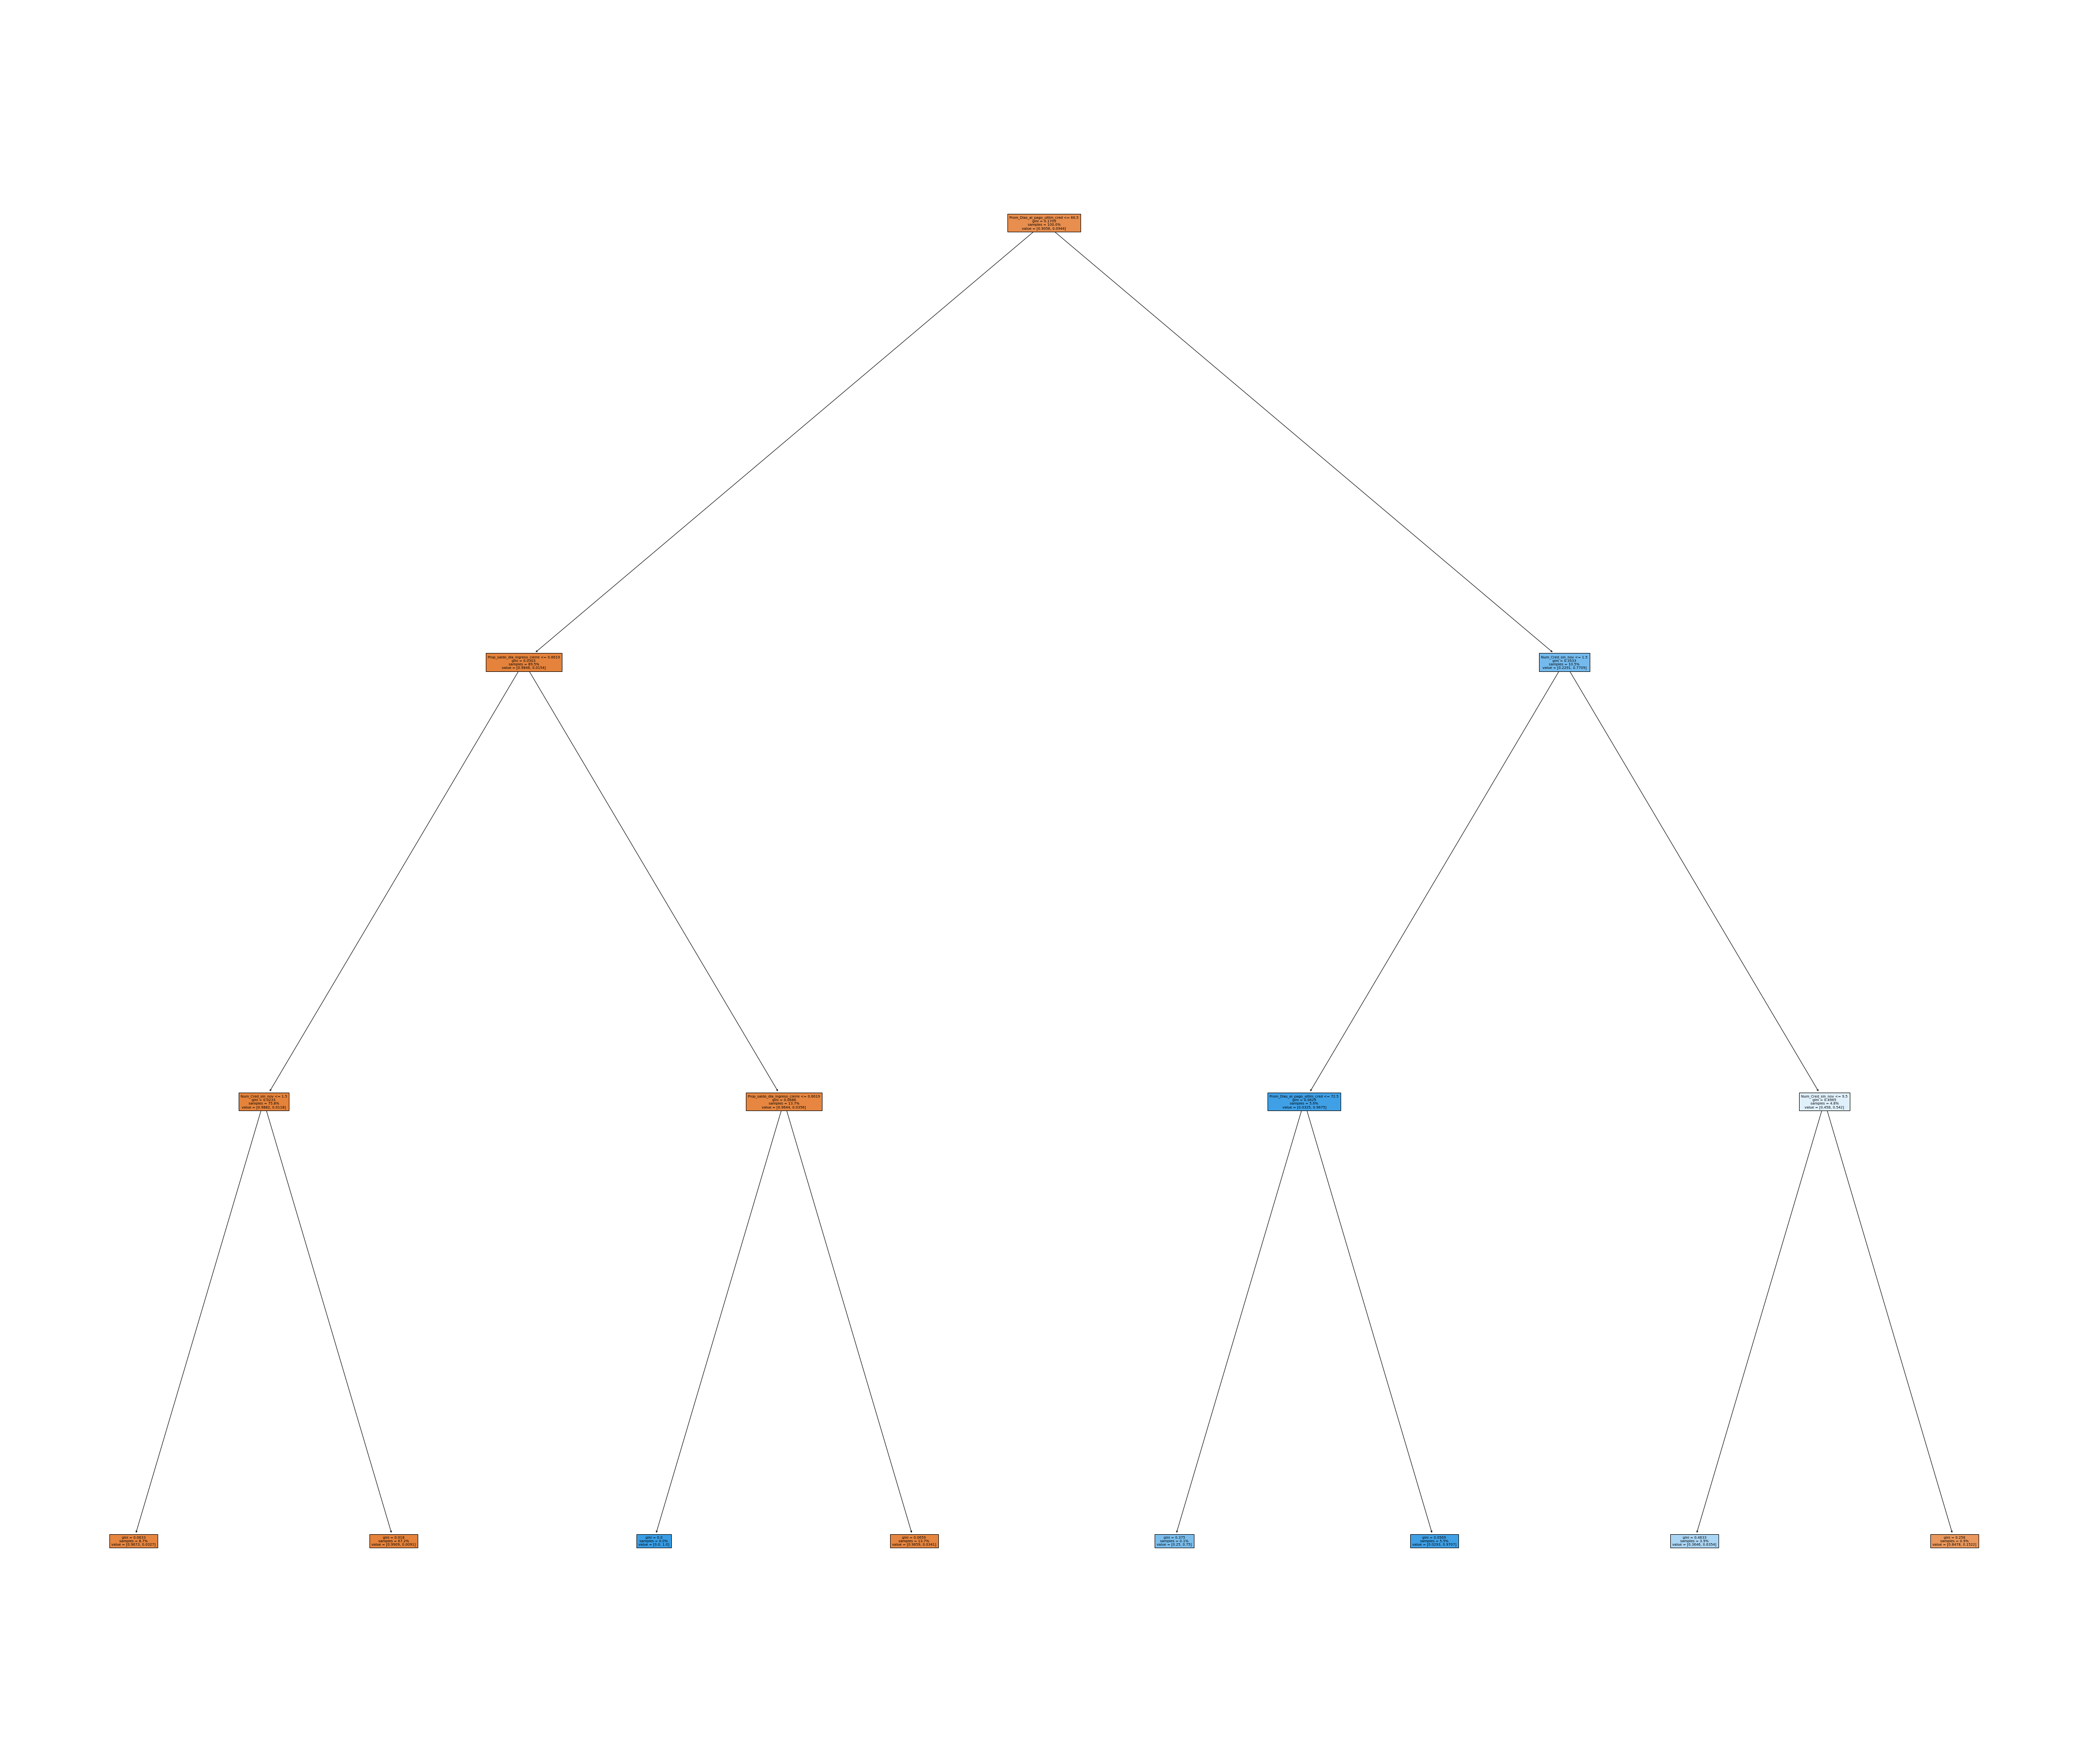

In [97]:
f, ax = plt.subplots(figsize=(75, 65))
plot_tree(clf_cv.best_estimator_,proportion=True, precision = 4, filled=True, ax=ax, fontsize=7, feature_names=base_modelo[sel_var[:-1]].columns)
plt.savefig(fname='Arbol_Modelo1')

In [7]:
import lightgbm as lgb

In [35]:
clf1 = lgb.LGBMClassifier()

In [36]:
grid = {'max_depth': [2,3,4,5]}

In [37]:
clf1.fit(X_train, y_train)

LGBMClassifier()

In [38]:
clf1_cv = GridSearchCV(estimator = clf1, param_grid = grid, scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)

In [39]:
clf1_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5]}, scoring='roc_auc',
             verbose=2)

In [40]:
clf1_cv.best_estimator_

LGBMClassifier(max_depth=2)

In [41]:
accuracies, media_cross, desviacion_cross = modelado.validacion_cruzada(clf1_cv.best_estimator_, X_train, y_train, 4, 'roc_auc')

In [42]:
print(accuracies, media_cross, desviacion_cross)

[0.94018102 0.97715608 0.97133621 0.97370299] 0.9655940760232605 0.014817472500367588


In [43]:
train_pred1, test_pred1 = modelado.calificacion('si', clf1_cv.best_estimator_, X_train, X_test, y_train, y_test)

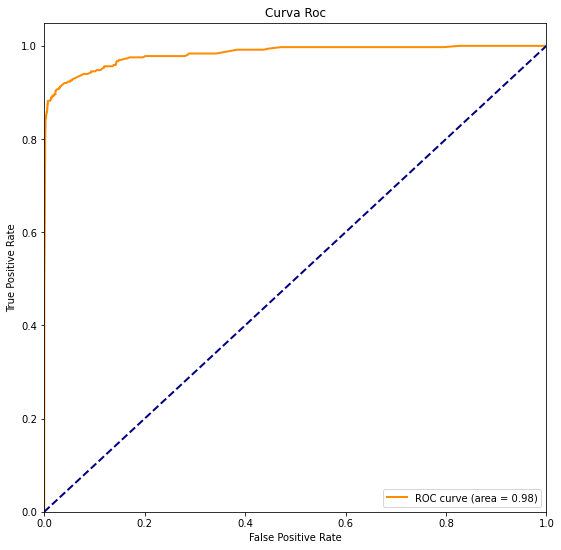


*************************************************************

El coeficiente de GINI es: 0.97

El área por debajo de la curva ROC es: 0.98

*************************************************************


0

In [44]:
modelado.plot_roc_gini(train_pred1.Target, train_pred1.probabilidad)

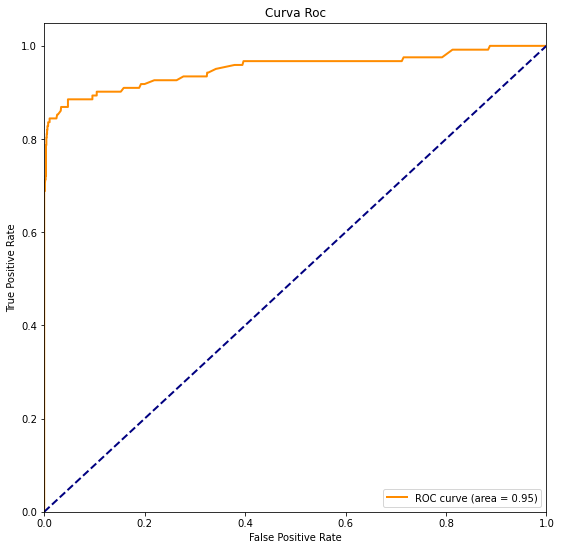


*************************************************************

El coeficiente de GINI es: 0.90

El área por debajo de la curva ROC es: 0.95

*************************************************************


0

In [45]:
modelado.plot_roc_gini(test_pred1.Target, test_pred1.probabilidad)

In [46]:
df_calf1 = modelado.calificacion('no', clf1_cv.best_estimator_, base2_ft[sel_var[:-1]], base2_ft, base2_ft.columns.tolist())

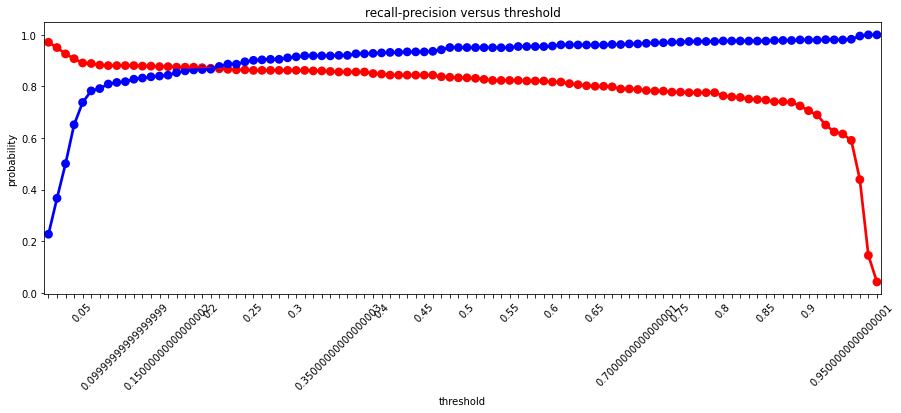

In [47]:
modelado.plot_recall_precission(df_calf1, 'Target')

In [48]:
def binary_target(x):
    if x<=0.2:
        y=0
    else:
        y=1
    return y

df_calf1 = df_calf1.assign(binary_y_predicted = df_calf1['probabilidad'].apply(binary_target))

In [49]:
print(classification_report(df_calf1.Target, df_calf1.binary_y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5583
           1       0.87      0.87      0.87       487

    accuracy                           0.98      6070
   macro avg       0.93      0.93      0.93      6070
weighted avg       0.98      0.98      0.98      6070



In [50]:
confusion_matrix(df_calf1.Target, df_calf1.binary_y_predicted)

array([[5518,   65],
       [  63,  424]], dtype=int64)

In [51]:
import pickle

In [52]:
Pkl_Filename = "Modelo_Cupo_LGBM.pkl"
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf1_cv.best_estimator_, file)

In [53]:
df_calf1.head()

Fecha      Cedula  Cupo_Solicitado   Ingreso  Prom_Dias_al_pago_u12m  \
0  2021-08    80064132           500000  35892855                    -2.0   
1  2021-05  1045667594           400000  22861058                   136.0   
2  2021-04    77090422           500000  20292227                    -4.0   
3  2021-08  1034318585           700000  18756420                     1.0   
4  2021-10  1034318585           750000  18756420                    -2.0   

   Prom_Dias_al_pago_ultim_cred  Num_Cred_sin_nov  Num_Cred_con_nov  \
0                          -4.0              11.0              14.0   
1                           2.0               6.0              10.0   
2                          -4.0               2.0               2.0   
3                           1.0               1.0               1.0   
4                          -4.0               4.0               4.0   

   Prop_saldo_dia_ingreso_cierre                 Score  Target  probabilidad  \
0                         0.0177              Aprobado       0      0.000210   
1                         0.0227              Aprobado       0      0.000424   
2                         0.0313              Aprobado       0      0.005700   
3                         0.0465  Aprobado solo 450000       0      0.007025   
4                         0.0497              Aprobado       0      0.004706   

   score_cal  binary_y_predicted  
0     1000.0                   0  
1     1000.0                   0  
2      994.0                   0  
3      993.0                   0  
4      995.0                   0

In [54]:
datos.guardar('no', 'DB', 'Califacion_Cupo_Evaluados', df_calf1)

In [55]:
df_calf1.query(" Target==1 ").shape

(487, 14)

In [56]:
aceptados = df_calf1.query(" Target==0 ").sample(n=487)

In [57]:
df_muestra = pd.concat([df_calf1.query(" Target==1 "), aceptados])

In [58]:
df_muestra.shape

(974, 14)

In [59]:
datos.guardar('no', 'DB', 'Califacion_Cupo_Evaluados_Muestra', df_muestra)